In [1]:
import os, psutil
import gc

import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate,cross_val_score,train_test_split, KFold, GridSearchCV, LearningCurveDisplay, ValidationCurveDisplay
from sklearn.metrics import classification_report, accuracy_score, log_loss, roc_auc_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn import ensemble,metrics,model_selection,neighbors,preprocessing, svm, tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder

import lightgbm as lgb
from lightgbm import LGBMClassifier

from statsmodels.graphics.mosaicplot import mosaic

from time import time

In [2]:
# Modified from HW 5 Q2 Part a.
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, debug=False):
  print(name)
    
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  print("Confusion matrix: ")
  # Print the confusion matrix computed from the test set (1 line of code only)
  ### START CODE ###
  #print(confusion_matrix(y_test, y_pred))
  ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)
  ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
  ### END CODE ###


  ### START CODE ###
  y_train_pred_proba = clf.predict_proba(X_train)
  y_test_pred_proba = clf.predict_proba(X_test)
    
  if debug == True:
      print(y_test_pred_proba)
      
  train_acc_score = accuracy_score(y_train, y_train_pred)
  test_acc_score = accuracy_score(y_test, y_test_pred)

  train_auc_score_ovo = roc_auc_score(y_train, y_train_pred_proba, multi_class='ovo')  
  train_auc_score_ovr = roc_auc_score(y_train, y_train_pred_proba, multi_class='ovr')
    
  test_auc_score_ovo = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovo')  
  test_auc_score_ovr = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')
  ### END CODE ###

  print("TRAIN - Accuracy: {}, AUC_ROC_OVO: {}, AUC_ROC_OVR: {}".format(train_acc_score, train_auc_score_ovo, train_auc_score_ovr))
  print("TEST - Accuracy: {}, AUC_ROC_OVO: {}, AUC_ROC_OVR: {}".format(test_acc_score, test_auc_score_ovo, test_auc_score_ovr))

  # Display Learning curve
  LearningCurveDisplay.from_estimator(clf, X_train, y_train, scoring='accuracy')
  #RocCurveDisplay.from_estimator(clf, X_test, y_test)
  return clf

In [3]:
df = pd.read_csv('dataset/train.csv')
df = df.drop(columns='id')

y = df['NObeyesdad']
X = df.drop(columns='NObeyesdad')

In [4]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [5]:
y

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [6]:
# TEST WITH DIFFERENT ENCODERS: ORDINAL, ONE-HOT, TARGET
encX = OrdinalEncoder()
X = encX.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [21]:
encX.categories_

[array(['Female', 'Male'], dtype=object),
 array([14.      , 15.      , 16.      , ..., 55.493687, 56.      ,
        61.      ]),
 array([1.45    , 1.456346, 1.463167, ..., 1.942725, 1.947406, 1.975663]),
 array([ 39.      ,  39.101805,  39.12631 , ..., 160.639405, 160.935351,
        165.057269]),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array([1.        , 1.002564  , 1.003566  , 1.005578  , 1.006436  ,
        1.00876   , 1.021136  , 1.031149  , 1.036159  , 1.036414  ,
        1.052699  , 1.053534  , 1.061461  , 1.063449  , 1.064162  ,
        1.067909  , 1.073224  , 1.078529  , 1.078719  , 1.081585  ,
        1.0816    , 1.096455  , 1.108663  , 1.111887  , 1.116068  ,
        1.118436  , 1.122127  , 1.123672  , 1.123939  , 1.133844  ,
        1.140466  , 1.140615  , 1.142468  , 1.164062  , 1.168856  ,
        1.188089  , 1.202075  , 1.203754  , 1.204855  , 1.206276  ,
        1.21232   , 1.220024  , 1.246822  , 1.252653  , 1.252698  ,
        1.253

Decision Tree
training time 0.133 s
predict time 0.004 s
Confusion matrix: 
TRAIN - Accuracy: 1.0, AUC_ROC_OVO: 1.0, AUC_ROC_OVR: 1.0
TEST - Accuracy: 0.8440751445086705, AUC_ROC_OVO: 0.8994408058487876, AUC_ROC_OVR: 0.9009880320876817


DecisionTreeClassifier()

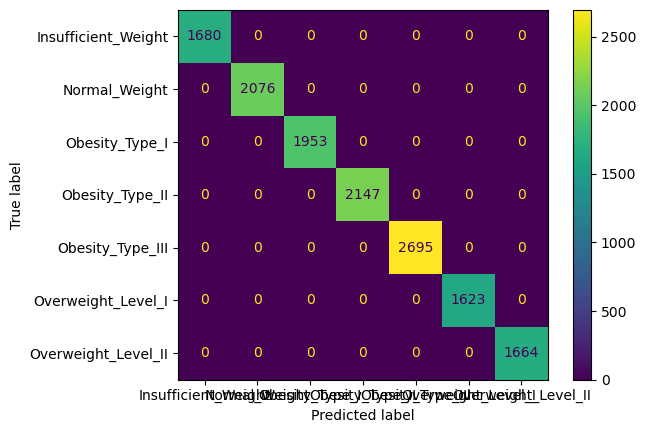

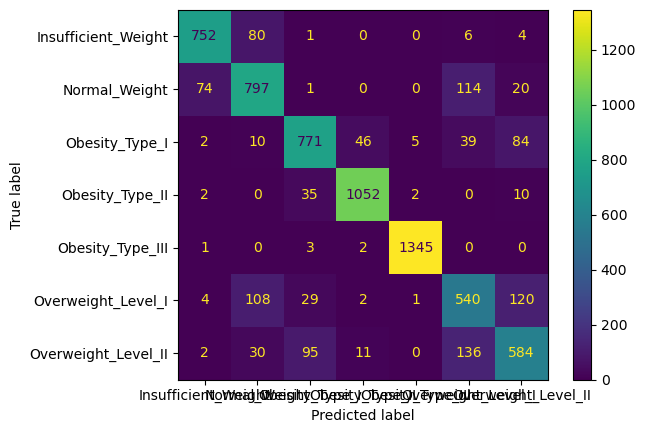

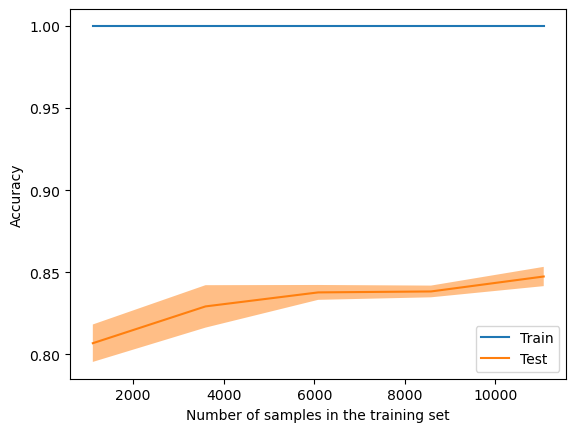

In [7]:
# Model 1 - Decision Tree
DT = DecisionTreeClassifier()

train_and_evaluate_classifier("Decision Tree", DT, X_train, y_train, X_test, y_test)

D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

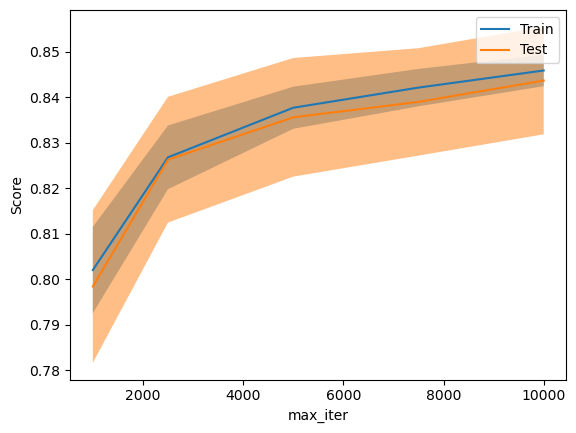

In [8]:
ValidationCurveDisplay.from_estimator(
   LogisticRegression(), X_train, y_train, param_name="max_iter", param_range=np.array([1000, 2500, 5000, 7500, 10000]), cv=10
)

Logistic Regression


D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training time 11.52 s
predict time 0.002 s
Confusion matrix: 
TRAIN - Accuracy: 0.8397889868478103, AUC_ROC_OVO: 0.9712573289294472, AUC_ROC_OVR: 0.974198674609359
TEST - Accuracy: 0.838728323699422, AUC_ROC_OVO: 0.9709651066069295, AUC_ROC_OVR: 0.9739391360778591


D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

LogisticRegression(max_iter=5000)

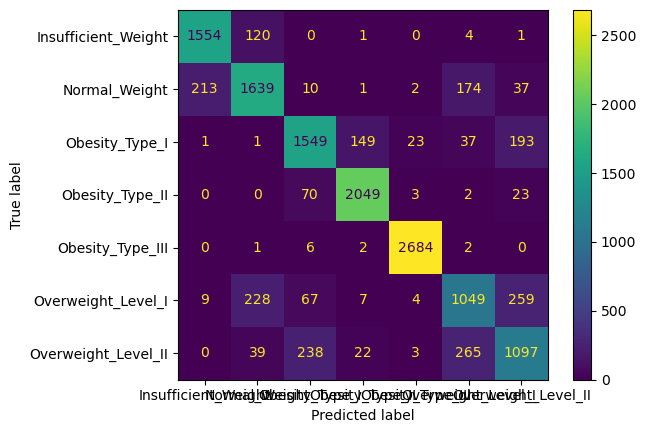

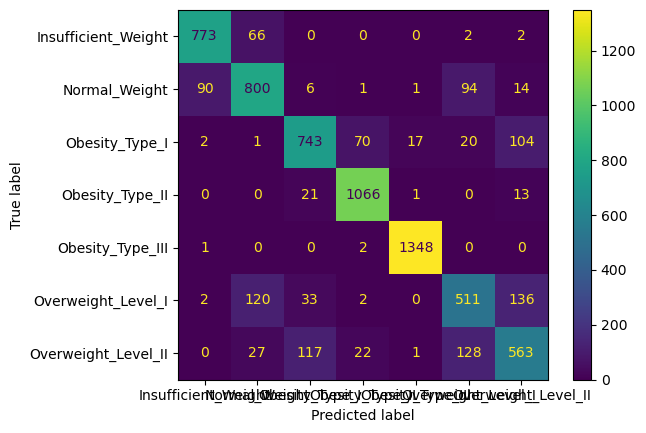

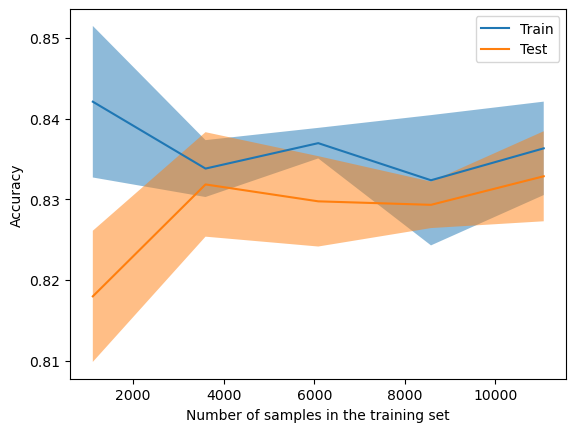

In [9]:
# Model 2a - Logistic Regression
LR = LogisticRegression(max_iter = 5000) # with some hyperparam tuning! Not comparable to other results

train_and_evaluate_classifier("Logistic Regression", LR, X_train, y_train, X_test, y_test)

Logistic Regression w/ CV


D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

training time 217.276 s
predict time 0.002 s
Confusion matrix: 
TRAIN - Accuracy: 0.85944500650383, AUC_ROC_OVO: 0.9757659242338458, AUC_ROC_OVR: 0.978325825063075
TEST - Accuracy: 0.8593930635838151, AUC_ROC_OVO: 0.975736940884778, AUC_ROC_OVR: 0.9782650154762217


D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

LogisticRegressionCV(max_iter=5000)

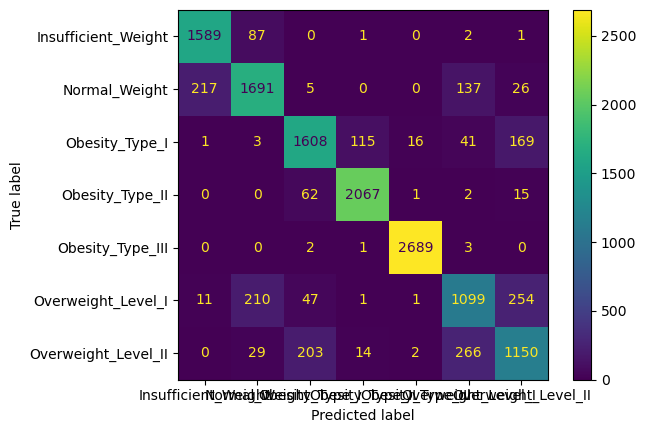

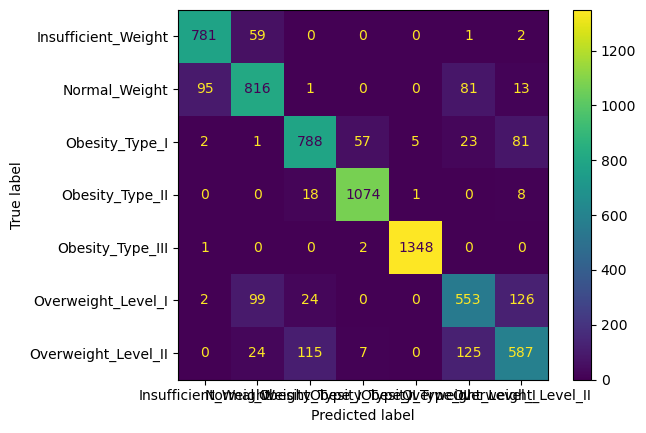

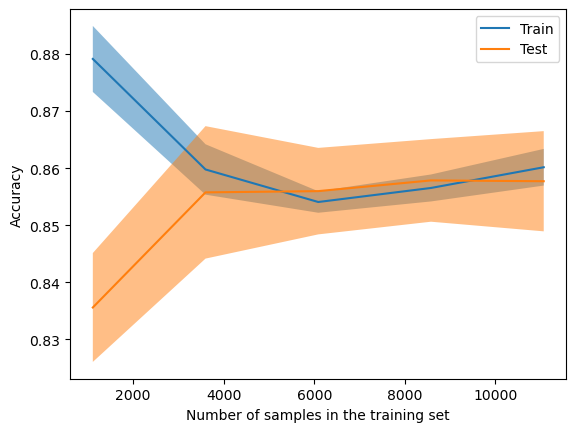

In [10]:
# Model 2b - Logistic Regression w/ CV
LRCV = LogisticRegressionCV(max_iter=5000)

train_and_evaluate_classifier("Logistic Regression w/ CV", LRCV, X_train, y_train, X_test, y_test)

MLP
training time 3.316 s
predict time 0.012 s
Confusion matrix: 
TRAIN - Accuracy: 0.7539384304090186, AUC_ROC_OVO: 0.9663054792635949, AUC_ROC_OVR: 0.9693414153607385
TEST - Accuracy: 0.7417630057803468, AUC_ROC_OVO: 0.957406166020428, AUC_ROC_OVR: 0.9612839577212053


MLPClassifier()

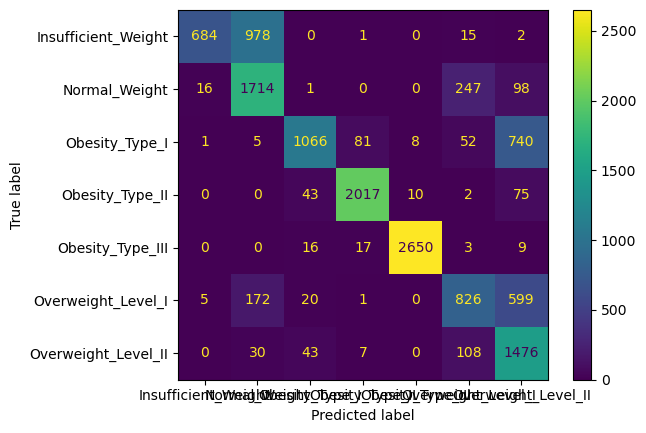

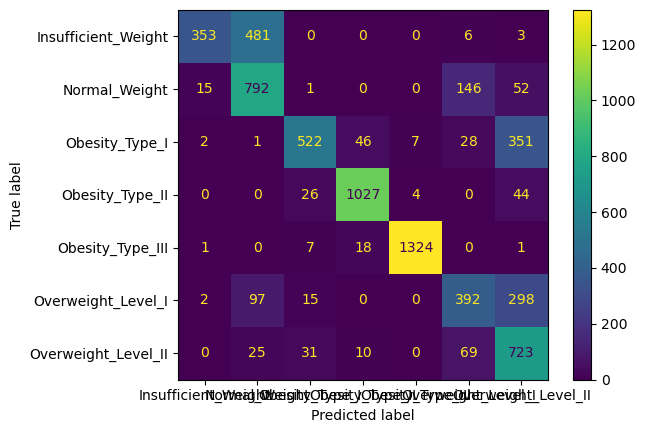

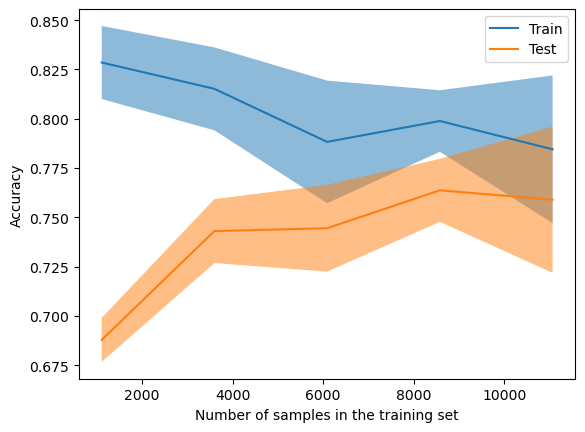

In [11]:
# Model 3 - MLP
MLP = MLPClassifier()

train_and_evaluate_classifier("MLP", MLP, X_train, y_train, X_test, y_test)

KNN
training time 0.011 s
predict time 0.484 s
Confusion matrix: 
TRAIN - Accuracy: 0.8472322589969649, AUC_ROC_OVO: 0.9814047927301554, AUC_ROC_OVR: 0.983421451385128
TEST - Accuracy: 0.7796242774566474, AUC_ROC_OVO: 0.9308665091296873, AUC_ROC_OVR: 0.9346307530178487


KNeighborsClassifier()

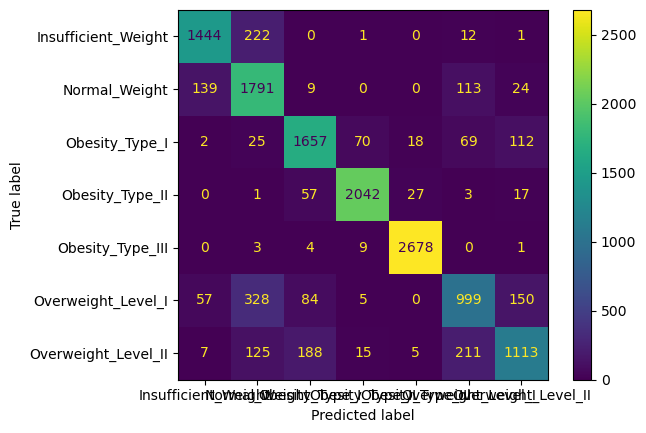

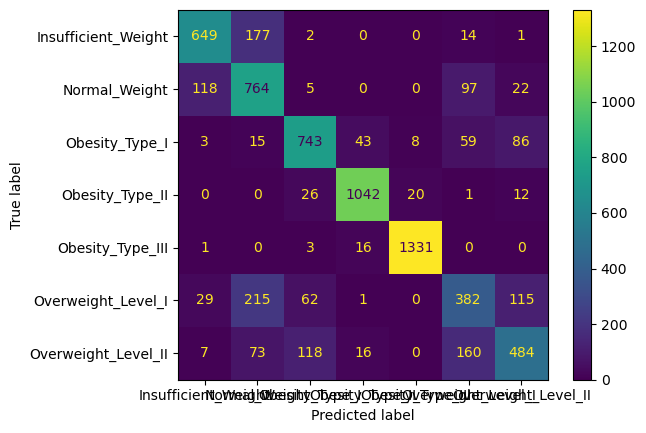

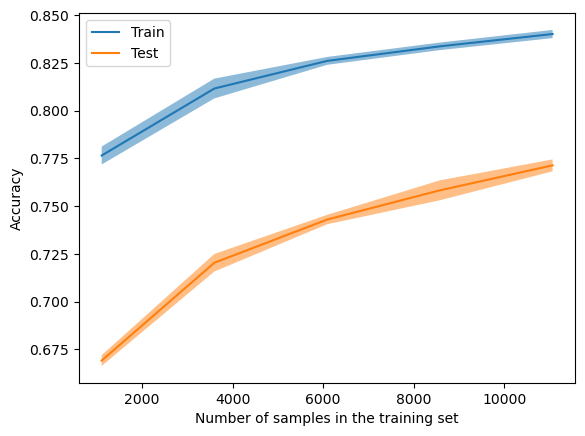

In [12]:
# Model 4 - KNN
KNN = KNeighborsClassifier()

train_and_evaluate_classifier("KNN", KNN, X_train, y_train, X_test, y_test)

SVM
training time 14.477 s
predict time 13.603 s
Confusion matrix: 
TRAIN - Accuracy: 0.8596618008382714, AUC_ROC_OVO: 0.9763815153554438, AUC_ROC_OVR: 0.9789356559867876
TEST - Accuracy: 0.8498554913294798, AUC_ROC_OVO: 0.974463888458008, AUC_ROC_OVR: 0.9772495723454727


SVC(probability=True)

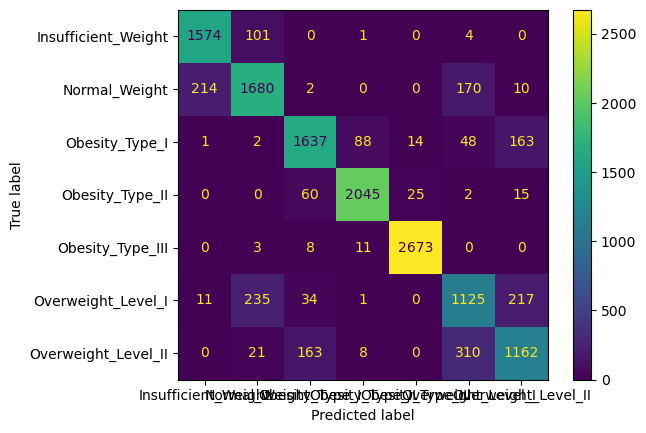

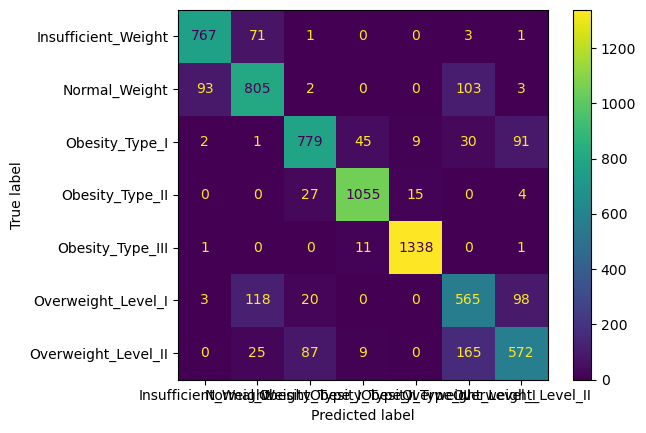

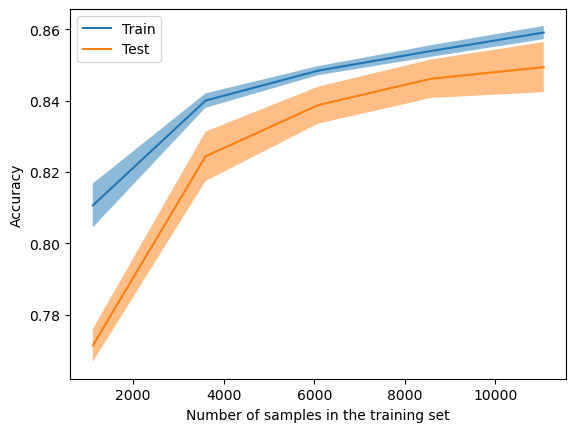

In [13]:
# Model 5 - SVM
SVM = SVC(probability=True)

train_and_evaluate_classifier("SVM", SVM, X_train, y_train, X_test, y_test)

LDA
training time 0.043 s
predict time 0.002 s
Confusion matrix: 
TRAIN - Accuracy: 0.7787252493134846, AUC_ROC_OVO: 0.9555744160836223, AUC_ROC_OVR: 0.960044125827311
TEST - Accuracy: 0.7835260115606937, AUC_ROC_OVO: 0.9561820263288063, AUC_ROC_OVR: 0.9608253913823583


LinearDiscriminantAnalysis()

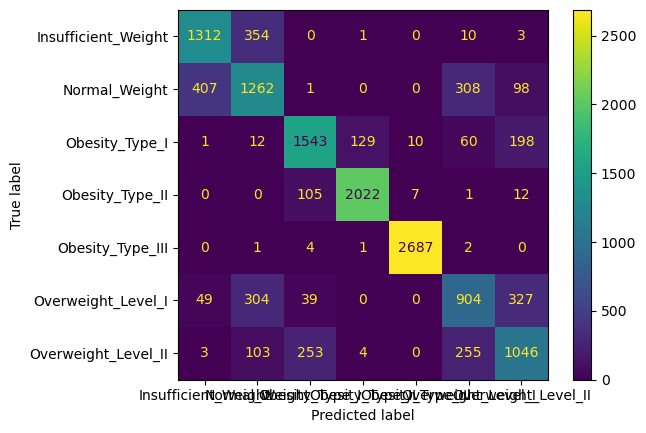

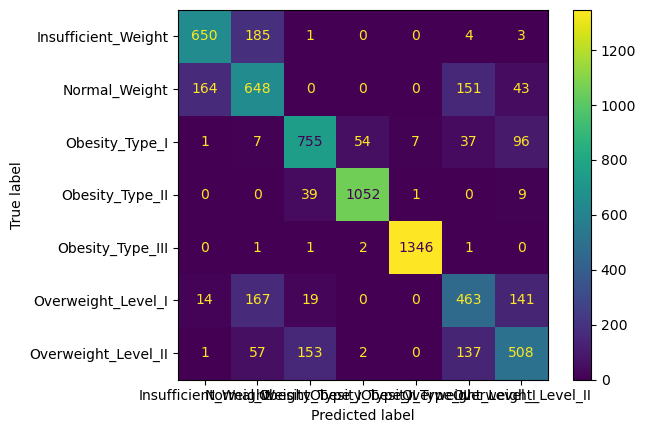

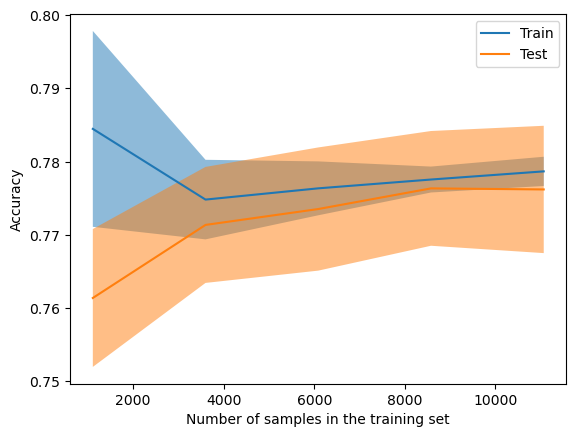

In [14]:
# Model 6a - LDA
LDA = LinearDiscriminantAnalysis()

train_and_evaluate_classifier("LDA", LDA, X_train, y_train, X_test, y_test)

QDA
training time 0.02 s
predict time 0.021 s
Confusion matrix: 


D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[[1.67091791e-170 4.31559022e-058 1.14608341e-014 ... 1.00000000e+000
  1.77776433e-035 2.99857714e-026]
 [1.64178593e-014 4.08995896e-002 5.15118712e-004 ... 0.00000000e+000
  8.25072304e-001 1.33512988e-001]
 [2.06424303e-032 1.26020166e-006 6.54017515e-001 ... 0.00000000e+000
  4.24284059e-002 3.03552786e-001]
 ...
 [3.07921190e-185 7.52749909e-057 9.78639636e-005 ... 0.00000000e+000
  5.40364699e-026 7.80809298e-016]
 [8.88736519e-124 3.30842857e-037 1.55749463e-003 ... 0.00000000e+000
  2.04605448e-015 8.39825426e-009]
 [9.66311626e-132 1.05287621e-037 2.08537269e-001 ... 0.00000000e+000
  8.23139980e-015 1.62999647e-007]]
TRAIN - Accuracy: 0.8515681456857928, AUC_ROC_OVO: 0.9752078065748804, AUC_ROC_OVR: 0.9778951848347947
TEST - Accuracy: 0.8492774566473988, AUC_ROC_OVO: 0.9740705582862825, AUC_ROC_OVR: 0.9769541025797231


D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are col

QuadraticDiscriminantAnalysis(reg_param=0.125)

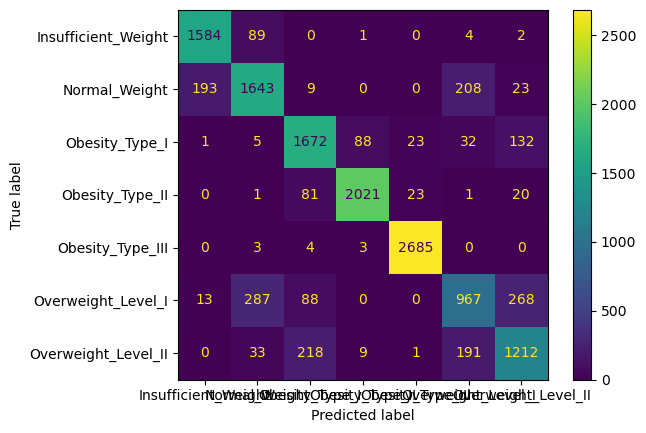

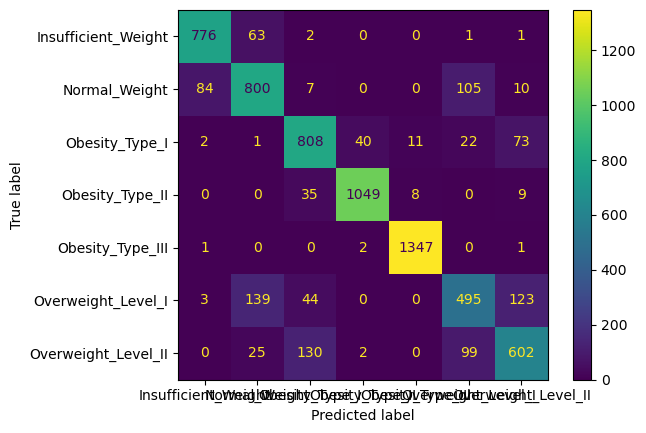

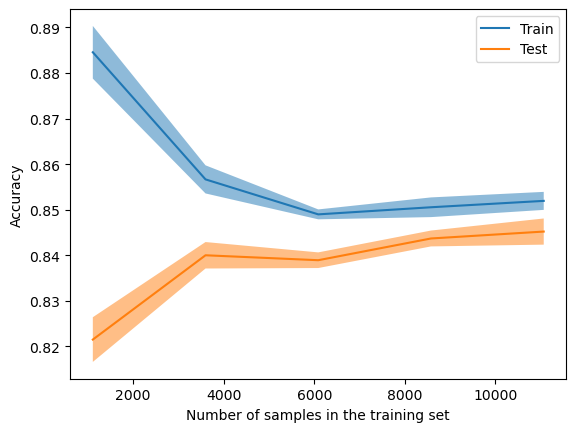

In [15]:
# Model 6b - QDA
QDA = QuadraticDiscriminantAnalysis(reg_param=0.125) # Some manual hyperparam tuning done here, not directly comparable to the above results

train_and_evaluate_classifier("QDA", QDA, X_train, y_train, X_test, y_test, True)

Gaussian Naive Bayes
training time 0.018 s
predict time 0.021 s
Confusion matrix: 
TRAIN - Accuracy: 0.659343835814424, AUC_ROC_OVO: 0.9184134607021519, AUC_ROC_OVR: 0.9262403343760823
TEST - Accuracy: 0.6614161849710982, AUC_ROC_OVO: 0.918797735857781, AUC_ROC_OVR: 0.9269633968419174


GaussianNB()

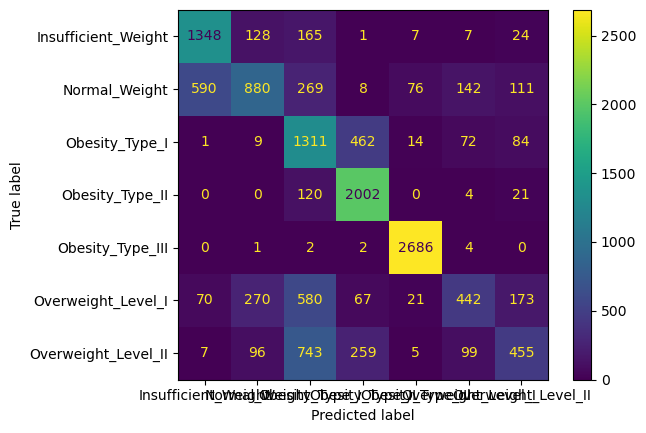

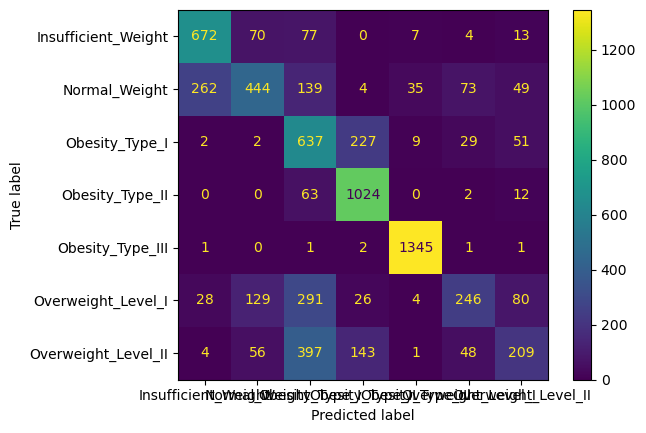

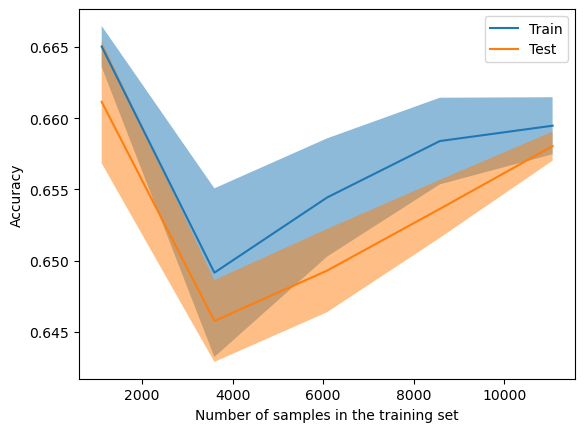

In [16]:
# Model 7a - Gaussian Naive Bayes
GaussNB = GaussianNB()

train_and_evaluate_classifier("Gaussian Naive Bayes", GaussNB, X_train, y_train, X_test, y_test)

Multinomial Naive Bayes
training time 0.039 s
predict time 0.008 s
Confusion matrix: 
TRAIN - Accuracy: 0.5267379679144385, AUC_ROC_OVO: 0.8502198245945929, AUC_ROC_OVR: 0.8581486505190153
TEST - Accuracy: 0.5206647398843931, AUC_ROC_OVO: 0.8496606924450628, AUC_ROC_OVR: 0.8578683418059817


MultinomialNB()

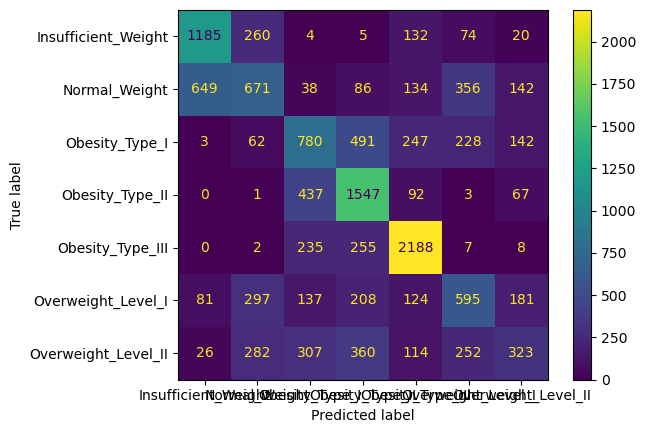

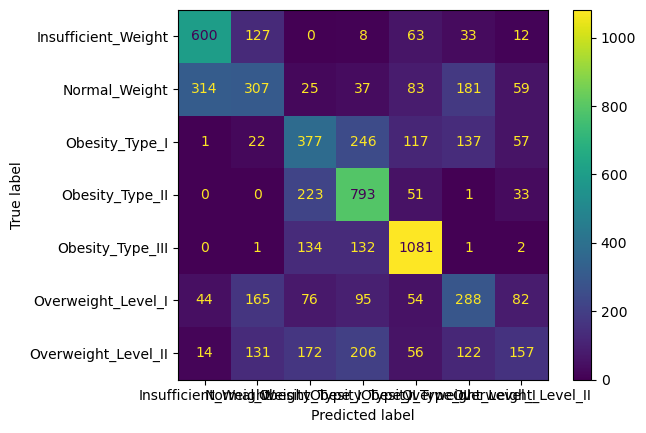

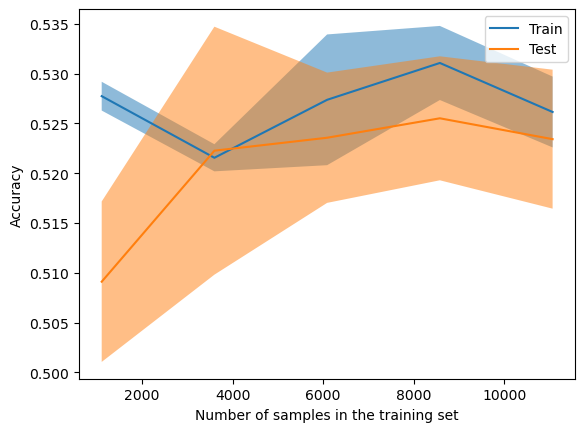

In [17]:
# Model 7b - Multinomial Naive Bayes
MultiNB = MultinomialNB()

train_and_evaluate_classifier("Multinomial Naive Bayes", MultiNB, X_train, y_train, X_test, y_test)

Complement Naive Bayes
training time 0.03 s
predict time 0.002 s
Confusion matrix: 
TRAIN - Accuracy: 0.47759791877438934, AUC_ROC_OVO: 0.814448289375134, AUC_ROC_OVR: 0.8304789168042838
TEST - Accuracy: 0.4777456647398844, AUC_ROC_OVO: 0.8130359255905023, AUC_ROC_OVR: 0.8299945305971959


ComplementNB()

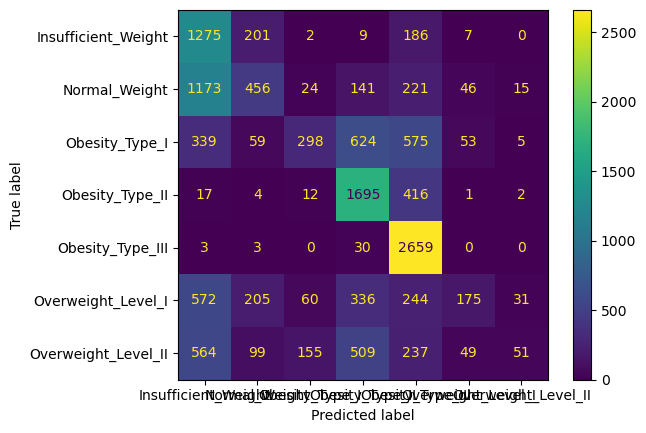

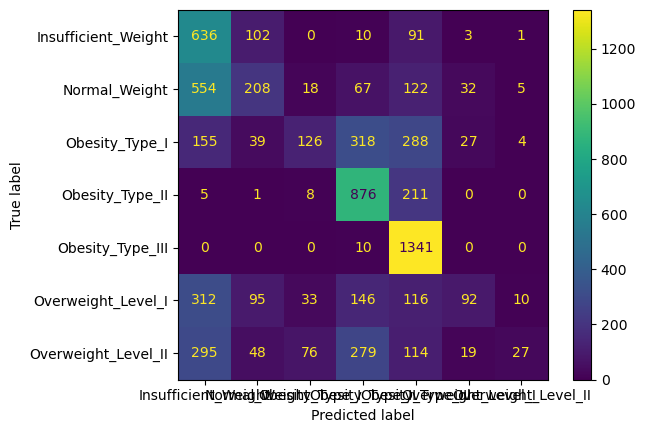

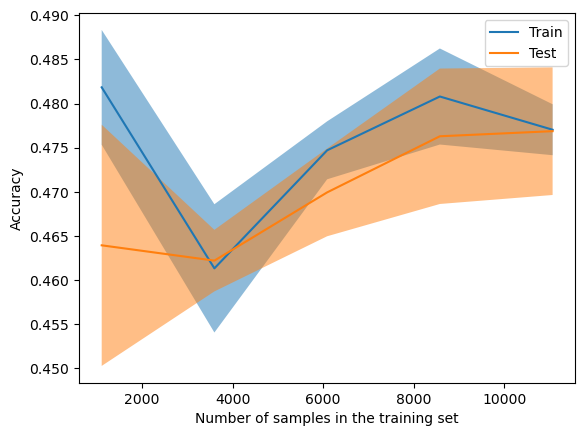

In [18]:
# Model 7c - Complement Naive Bayes
ComplementNB = ComplementNB()

train_and_evaluate_classifier("Complement Naive Bayes", ComplementNB, X_train, y_train, X_test, y_test)

Bernoulli Naive Bayes
training time 0.034 s
predict time 0.005 s
Confusion matrix: 
TRAIN - Accuracy: 0.5299898829310594, AUC_ROC_OVO: 0.7993506558398578, AUC_ROC_OVR: 0.8101409881453716
TEST - Accuracy: 0.5302023121387284, AUC_ROC_OVO: 0.7956329589238246, AUC_ROC_OVR: 0.806429135696971


BernoulliNB()

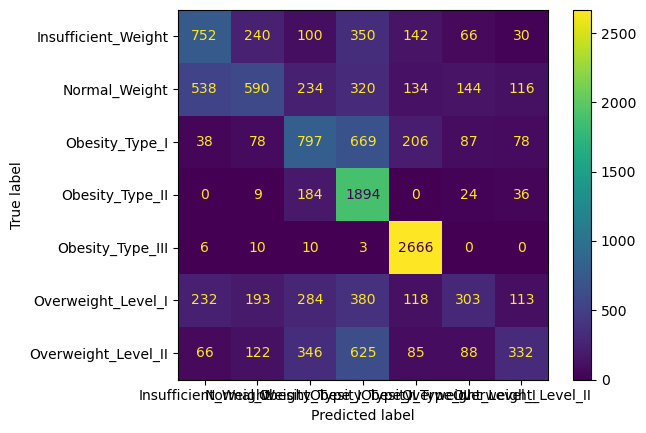

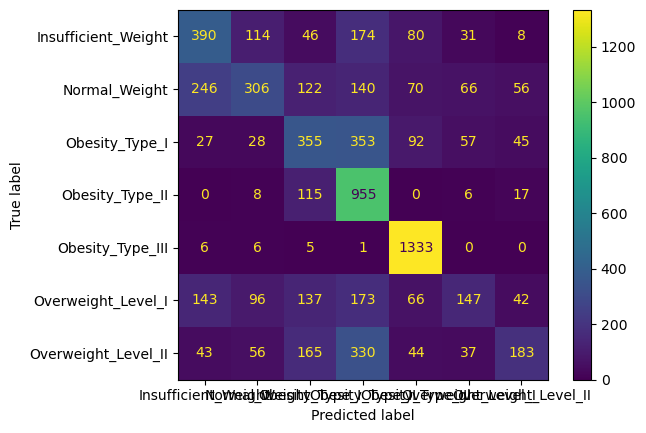

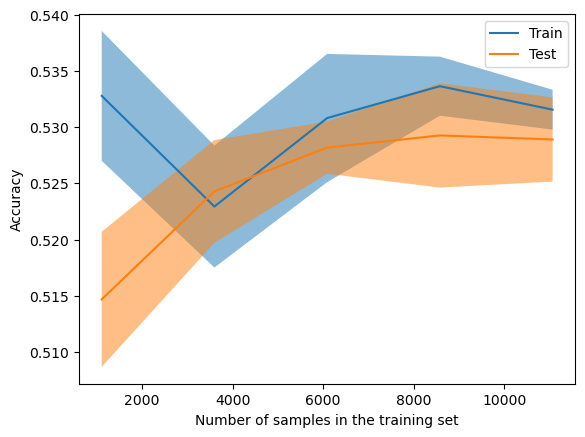

In [19]:
# Model 7d - Bernoulli Naive Bayes
BernNB = BernoulliNB()

train_and_evaluate_classifier("Bernoulli Naive Bayes", BernNB, X_train, y_train, X_test, y_test)

Categorical Naive Bayes
training time 0.052 s
predict time 0.009 s
Confusion matrix: 
TRAIN - Accuracy: 0.8386327503974563, AUC_ROC_OVO: 0.9798078111191958, AUC_ROC_OVR: 0.9818784794944376
TEST - Accuracy: 0.7638728323699422, AUC_ROC_OVO: 0.9576274852357395, AUC_ROC_OVR: 0.9619865322823512


D:\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respon

CategoricalNB()

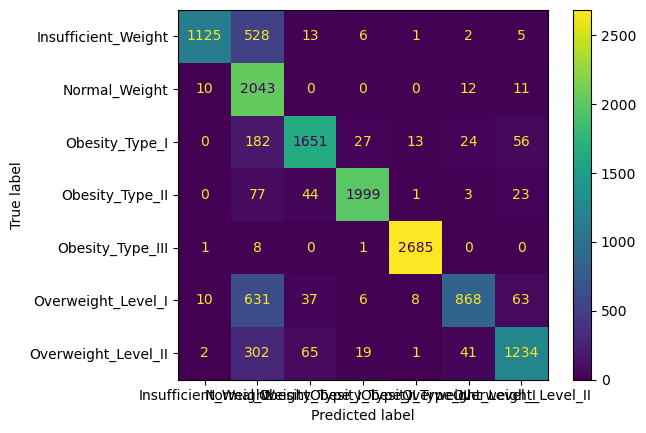

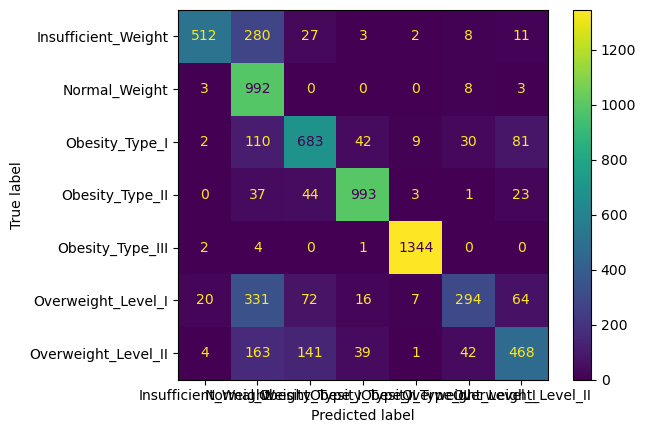

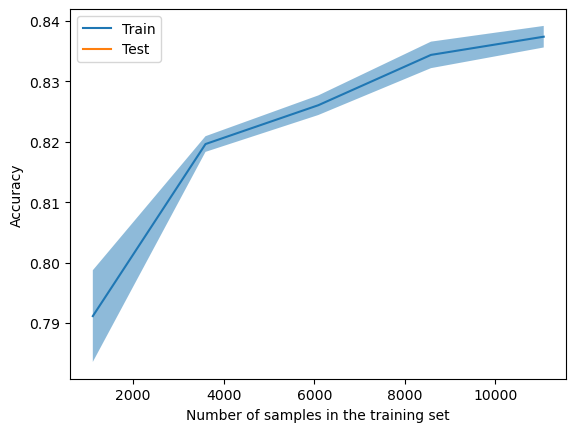

In [22]:
# Model 7e - Categorical Naive Bayes
CatNB = CategoricalNB()

train_and_evaluate_classifier("Categorical Naive Bayes", CatNB, X_train, y_train, X_test, y_test)

## Summary of Learning Curves:    
Decision Tree - Overfit    
Logistic Regression - Underfit?/Closifi    t
MLP - Slight Overf    it
KNN - Over    fit
SVM - Slight Ove    rfit
LDA - Underfit/Clo    sefit
QDA - Super slight o    verfit
GaussNB - Bad U    nderfit
MultiNB - Super Bad     Underfit
ComplementNB - Really Super Bad     Underfit
BernNB - Super Ba    d Underfit
CatB KNN, LDA, CatNB KNN, LDA, CatNBKNN, LDA, CatNB

## Best Models to move forward with:
    Best - DT, Log Reg, SVM, QDA
    Ok - MLP, KNN, LDA, CatNB